# Mount Drive for dataset Load

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Install Dependencies

In [2]:
!pip install jiwer
!pip install pandas
!pip install tensorflow
!pip install Numpy
!pip install matplotlib


     |████████████████████████████████| 50 kB 8.5 MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149857 sha256=ccbe2673b05d1b0fa7493f0c7de920382321fe7a89e1e89c3f64d1358cce02d8
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-Levenshtein


## Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from IPython import display
from jiwer import wer


# Load The Dataset

In [8]:
data_path = r"C:/Users/purek/OneDrive/Desktop/Forkan last semester/Bangla_ASR_Done/Final_project/asr_data/data/asr_bengali_1000/asr_bengali_1000_wav"
wavs_path = data_path
metadata_path = r"C:/Users/purek/OneDrive/Desktop/Forkan last semester/Bangla_ASR_Done/Final_project/asr_data/data/asr-bengali-1000/data.csv"

print(data_path)
# Read metadata file and parse it
metadata_df = pd.read_csv(metadata_path, sep=",")
metadata_df.columns = ["audio", "text"]
metadata_df = metadata_df[["audio", "text"]]
metadata_df = metadata_df.sample(frac=1).reset_index(drop=True)
metadata_df.head(10)


C:/Users/purek/OneDrive/Desktop/Forkan last semester/Bangla_ASR_Done/Final_project/asr_data/data/asr_bengali_1000/asr_bengali_1000_wav


,audio,text
0,0aaa966bc8.wav,পুতুল রূপন্তি
1,0a44d7c7a0.wav,ফায়ার সার্ভিস কন্ট্রোল রুম
2,0a3308f0d7.wav,এই গ্রন্থে
3,0525cf0928.wav,হাত দিয়ে বুঝল
4,05213fce42.wav,যুদ্ধাপরাধের মামলায় গ্রেপ্তার
5,0509f6be93.wav,স্পট ফিক্সিং
6,0a9a2dbb03.wav,মঙ্গলবার দুপুরে
7,0a1a28be47.wav,আলকায়েদার নতুন শাখা
8,0595ed0fff.wav,আয়োজনে বিস্তারিত তথ্য জানতে
9,0a1eb9755c.wav,সেলিনা হোসেন দুটোই


# Split the dataset into training and validation set

In [9]:
split = int(len(metadata_df) * .95)
df_train = metadata_df[:split]


split2 = int(len(metadata_df) * .05)
df_val = metadata_df[:split2]

print(f"Size of the training set: {len(df_train)}")
print(f"Size of the validation set: {len(df_val)}")


Size of the training set: 948
Size of the validation set: 49


Test_Data

In [6]:
test_path = "/content/drive/MyDrive/Colab Notebooks/data (1)/test_data"
wav_path = test_path
metadata_path_test = "/content/drive/MyDrive/Colab Notebooks/data (1)/test.csv"

print(test_path)
# Read metadata file and parse it
test_data_df = pd.read_csv(metadata_path_test, sep="|")
test_data_df.columns = ["audio", "text"]
test_data_df = test_data_df[["audio", "text"]]
test_data_df = test_data_df.sample(frac=1).reset_index(drop=True)
test_data_df.head(5)

/content/drive/MyDrive/Colab Notebooks/data (1)/test_data


,audio,text
0,rgt (3).wav,সুযোগ হলে রাঙ্গামাটি ঘুরে যেও
1,valobashi (2).wav,আমি তোমাকে ভালোবাসি
2,where (2).wav,তুমি কোথায় থাক
3,name (3).wav,তোমার নাম কি
4,rgt (2).wav,সুযোগ হলে রাঙ্গামাটি ঘুরে যেও


In [7]:
split3 = int(len(test_data_df) * 1.0)
df_test = test_data_df[:split3]


print(f"Size of the testing set: {len(df_test)}")

Size of the testing set: 18


## Preprocessing

We first prepare the vocabulary to be used.

In [8]:
chars_db_path = '/content/drive/MyDrive/Colab Notebooks/data (1)/chars_75.csv'

unique_chars = pd.read_csv(chars_db_path, skip_blank_lines=False)['chars']
unique_chars = unique_chars.to_list()

# Mapping characters to integers
char_to_num = keras.layers.StringLookup(vocabulary=unique_chars, oov_token="")
# Mapping integers back to original characters
num_to_char = keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)
print(
    f"The vocabulary is: {char_to_num.get_vocabulary()} "
    f"(size ={char_to_num.vocabulary_size()})"
)

The vocabulary is: ['', ' ', '।', 'ঁ', 'ং', 'ঃ', 'অ', 'আ', 'ই', 'ঈ', 'উ', 'ঋ', 'এ', 'ঐ', 'ও', 'ক', 'খ', 'গ', 'ঘ', 'ঙ', 'চ', 'ছ', 'জ', 'ঝ', 'ঞ', 'ট', 'ঠ', 'ড', 'ঢ', 'ণ', 'ত', 'থ', 'দ', 'ধ', 'ন', 'প', 'ফ', 'ব', 'ভ', 'ম', 'য', 'র', 'ল', 'শ', 'ষ', 'স', 'হ', '়', 'া', 'ি', 'ী', 'ু', 'ূ', 'ৃ', 'ে', 'ৈ', 'ো', 'ৌ', '্', 'ৎ', 'ড়', 'য়', '০', '১', '২', '৩', '৪', '৫', '৬', '৭', '৮', '৯'] (size =72)


# Spectogram and Label for preprocess

In [9]:

frame_length = 256
frame_step = 160
fft_length = 384


def encode_single_sample(wav_file, label):
    # Read wav file
    file = tf.io.read_file(data_path+"/"+wav_file)
    # Decode the wav file
    audio, _ = tf.audio.decode_wav(file)
    audio = tf.squeeze(audio, axis=-1)
    # Change type to float
    audio = tf.cast(audio, tf.float32)
    # Get the spectrogram
    spectrogram = tf.signal.stft(
        audio, frame_length=frame_length, frame_step=frame_step, fft_length=fft_length
    )
    # Magnitude value
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.math.pow(spectrogram, 0.5)
    # normalization the magnitude
    means = tf.math.reduce_mean(spectrogram, 1, keepdims=True)
    stddevs = tf.math.reduce_std(spectrogram, 1, keepdims=True)
    spectrogram = (spectrogram - means) / (stddevs + 1e-10)


    ##  Process the label

    # Convert label to Lower case
    label = tf.strings.lower(label)
    label = tf.strings.unicode_split(label, input_encoding="UTF-8")
    # Map the characters in label to numbers
    label = char_to_num(label)

    return spectrogram, label


## Creating `Dataset` objects

We create a `tf.data.Dataset` object that yields
the transformed elements, in the same order as they
appeared in the input.

In [31]:
batch_size = 5
# Define the trainig dataset
train_dataset = tf.data.Dataset.from_tensor_slices(
    (list(df_train["audio"]), list(df_train["text"]))
)
train_dataset = (
    train_dataset.map(encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE)
    .padded_batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

# Define the validation dataset
validation_dataset = tf.data.Dataset.from_tensor_slices(
    (list(df_val["audio"]), list(df_val["text"]))
)
validation_dataset = (
    validation_dataset.map(encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE)
    .padded_batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)




## Model

CTC Loss function.

In [11]:

def CTCLoss(y_true, y_pred):
    # Compute the training-time loss value
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    loss = keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss


# ASR model

In [12]:

def build_model(input_dim, output_dim, rnn_layers=5, rnn_units=128):
    """Bangla_ASR"""
    # Model's input
    input_spectrogram = layers.Input((None, input_dim), name="input")
    # Expand the dimension to use 2D CNN.
    x = layers.Reshape((-1, input_dim, 1), name="expand_dim")(input_spectrogram)
    
    filters = 3

    # Convolution layer 1
    x = layers.Conv2D(filters=filters, kernel_size=[11, 41], strides=[2, 2], padding="same", use_bias=False, name="convolution_1")(x)
    x = layers.BatchNormalization(name="convolution_1_bn")(x)
    x = layers.ReLU(name="convolution_1_relu")(x)
    
    
    # Convolution layer 2
    x = layers.Conv2D( filters=filters, kernel_size=[11, 21], strides=[1, 2], padding="same", use_bias=False, name="convolution_2")(x)
    x = layers.BatchNormalization(name="convolution_2_bn")(x)
    x = layers.ReLU(name="convolution_2_relu")(x)

    # Reshape the resulted volume to feed the RNNs layers
    x = layers.Reshape((-1, x.shape[-2] * x.shape[-1]))(x)


    # RNN layers
    for i in range(1, rnn_layers + 1):
        recurrent = layers.GRU(
            units=rnn_units, 
            activation="tanh", 
            recurrent_activation="sigmoid", 
            use_bias=True, 
            return_sequences=True, 
            reset_after=True, 
            name=f"GRU_{i}")
        x = layers.Bidirectional(recurrent, name=f"bidirectional_{i}", merge_mode="concat")(x)
        if i < rnn_layers:
            x = layers.Dropout(rate=0.5)(x)



    # Dense layer
    x = layers.Dense(units=rnn_units * 2, name="dense_1")(x)
    x = layers.ReLU(name="dense_1_relu")(x)
    x = layers.Dropout(rate=0.35)(x)


    # Classification layer
    output = layers.Dense(units=output_dim + 1, activation="softmax")(x)

    # Model
    model = keras.Model(input_spectrogram, output, name="Bangla_ASR")
    # Adam Optimizer
    opt = keras.optimizers.Adam(learning_rate=1e-4)

    # Compile the model and return
    model.compile(optimizer=opt, loss=CTCLoss)

    return model


# Get the model
model = build_model(
    input_dim=fft_length // 2 + 1,
    output_dim=char_to_num.vocabulary_size(),
    rnn_units=512,
)
model.summary(line_length=110)

Model: "Bangla_ASR"
______________________________________________________________________________________________________________
 Layer (type)                                    Output Shape                                Param #          
 input (InputLayer)                              [(None, None, 193)]                         0                
                                                                                                              
 expand_dim (Reshape)                            (None, None, 193, 1)                        0                
                                                                                                              
 convolution_1 (Conv2D)                          (None, None, 97, 3)                         1353             
                                                                                                              
 convolution_1_bn (BatchNormalization)           (None, None, 97, 3)                        

## Decoder & Callback 

In [13]:
# decode the output of the network
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    # CTC_DECODE
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0]
    # Iterate over the results and get back the text
    output_text = []
    for result in results:
        result = tf.strings.reduce_join(num_to_char(result)).numpy().decode("utf-8")
        output_text.append(result)
    return output_text

cnt=0
# A callback class to output a few transcriptions during training
class CallbackEval(keras.callbacks.Callback):
    """Displays a batch of outputs after every epoch."""

    def __init__(self, dataset):
        super().__init__()
        self.dataset = dataset

    def on_epoch_end(self, epoch: int, logs=None):
        # model_name="ASR_model_"+str(cnt)+".h5"
        # model.save(model_name)
        # cnt+=1
        predictions = []
        targets = []
        for batch in self.dataset:
            X, y = batch
            batch_predictions = model.predict(X)
            batch_predictions = decode_batch_predictions(batch_predictions)
            predictions.extend(batch_predictions)
            for label in y:
                label = (
                    tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
                )
                targets.append(label)
        wer_score = wer(targets, predictions)
        print("-" * 100)
        print(f"Word Error Rate: {wer_score:.4f}")
        print("-" * 100)
        for i in np.random.randint(0, len(predictions), 2):
            print(f"Target    : {targets[i]}")
            print(f"Prediction: {predictions[i]}")
            print("-" * 100)


# Final Model Train

In [14]:

epochs = 100
# Callback function to check transcription on the val set.
validation_callback = CallbackEval(validation_dataset)
# Train the model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs,
    callbacks=[validation_callback],
)

model.save('Final_model.h5') 

Epoch 1/80
198/198 [==============================] - ETA: 0s - loss: 96.4335----------------------------------------------------------------------------------------------------
Word Error Rate: 1.0000
----------------------------------------------------------------------------------------------------
Target    : এসব বক্তব্য এসেছে
Prediction: 
----------------------------------------------------------------------------------------------------
Target    : প্রাণী জগত
Prediction: 
----------------------------------------------------------------------------------------------------
198/198 [==============================] - 241s 1s/step - loss: 96.4335 - val_loss: 76.7708
Epoch 2/80
198/198 [==============================] - ETA: 0s - loss: 69.8682----------------------------------------------------------------------------------------------------
Word Error Rate: 1.0000
----------------------------------------------------------------------------------------------------
Target    : ১৮৯০ সালে

#   Plot History of the model

In [15]:
# # Plot History
# def plot_history(history):

#     fig, axs = plt.subplots(2)
#     # accuracy sublpot
#     axs[0].plot(history.history["accuracy"], label="train accuracy")
#     axs[0].plot(history.history["val_accuracy"], label="test accuracy")
#     axs[0].set_ylabel("Accuracy")
#     axs[0].legend(loc="lower right")
#     axs[0].set_title("Accuracy eval")

#     # error sublpot
#     axs[1].plot(history.history["loss"], label="train error")
#     axs[1].plot(history.history["val_loss"], label="test error")
#     axs[1].set_ylabel("Error")
#     axs[1].set_xlabel("Epoch")
#     axs[1].legend(loc="upper right")
#     axs[1].set_title("Error eval")

#     plt.show()

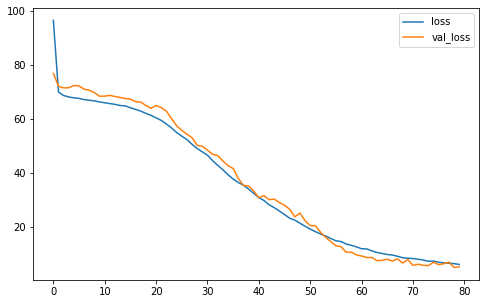

In [16]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

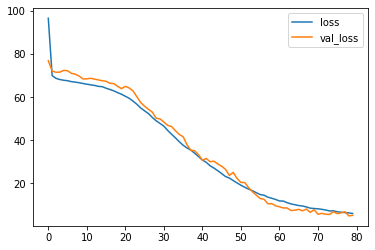

In [17]:
metrics = history.history
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [18]:
hist_df = pd.DataFrame(history.history) 

# save to json:  
hist_json_file = 'history.json' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

## Predictions

In [19]:
# Check results on more validation samples
predictions = []
targets = []
for batch in validation_dataset:
    X, y = batch
    batch_predictions = model.predict(X)
    batch_predictions = decode_batch_predictions(batch_predictions)
    predictions.extend(batch_predictions)
    for label in y:
        label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
        targets.append(label)
wer_score = wer(targets, predictions)
print("-" * 100)
print(f"Word Error Rate: {wer_score:.4f}")
print("-" * 100)
for i in np.random.randint(0, len(predictions), 10):
    print(f"Target    : {targets[i]}")
    print(f"Prediction: {predictions[i]}")
    print("-" * 100)


----------------------------------------------------------------------------------------------------
Word Error Rate: 0.2645
----------------------------------------------------------------------------------------------------
Target    : তত্ত্বাবধানে ওক্তাবিও পাজ
Prediction: তবানে ওক্তাবিও পাজ
----------------------------------------------------------------------------------------------------
Target    : ১৮ জন অগ্নিদগ্ধ হন
Prediction: শ৮ জন অ্নিদগ্ধ হন
----------------------------------------------------------------------------------------------------
Target    : সম্পর্ক এড়িয়ে চলাই ভালো
Prediction: সম্পর্ক এডিয়ে চলাই ভালো
----------------------------------------------------------------------------------------------------
Target    : গাম
Prediction: গা
----------------------------------------------------------------------------------------------------
Target    : বিধবা
Prediction: বিধবা
--------------------------------------------------------------------------------------------------